In [1]:
import pandas as pd
import sqlite3
import matplotlib
import ipywidgets
import matplotlib.pyplot as plt
import regex as re

# IMDb Data
Found on: https://datasets.imdbws.com/

Lisence: Subsets of IMDb data are available for access to customers for personal and non-commercial use. https://help.imdb.com/article/imdb/general-information/can-i-use-imdb-data-in-my-software/G5JTRESSHJBBHTGX?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=3aefe545-f8d3-4562-976a-e5eb47d1bb18&pf_rd_r=4T3EYTP8F7MDAN370387&pf_rd_s=center-1&pf_rd_t=60601&pf_rd_i=interfaces&ref_=fea_mn_lk1

- name.basics.tsv.gz – Contains the following information for names:
    - nconst (string) - alphanumeric unique identifier of the name/person
    - primaryName (string)– name by which the person is most often credited
    - birthYear – in YYYY format
    - deathYear – in YYYY format if applicable, else '\N'
    - primaryProfession (array of strings)– the top-3 professions of the person
    - knownForTitles (array of tconsts) – titles the person is known for
- title.basics.tsv.gz - Contains the following information for titles:
    - tconst (string) - alphanumeric unique identifier of the title
    - titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
    - primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
    - originalTitle (string) - original title, in the original language
    - isAdult (boolean) - 0: non-adult title; 1: adult title
    - startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
    - endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
    - runtimeMinutes – primary runtime of the title, in minutes
    - genres (string array) – includes up to three genres associated with the title
- title.principals.tsv.gz – Contains the principal cast/crew for titles
    - tconst (string) - alphanumeric unique identifier of the title
    - ordering (integer) – a number to uniquely identify rows for a given titleId
    - nconst (string) - alphanumeric unique identifier of the name/person
    - category (string) - the category of job that person was in
    - job (string) - the specific job title if applicable, else '\N'
    - characters (string) - the name of the character played if applicable, else '\N'
    
These files are essentially all of the IMDb data so the unzipped files are HUGE! Therefore, I included them in my .gitignore file.

In [2]:
!pwd

/Users/tzacks2/Desktop/GradSchool/Spring22/SNL_Final


In [3]:
principals = pd.read_csv('Imdb_data/title.principals.tsv',delimiter='\t')
basics = pd.read_csv('Imdb_data/title.basics.tsv',delimiter='\t')
imdb_names = pd.read_csv('Imdb_data/name.basics.tsv',delimiter='\t')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# SNL UIDs
- tt0715791
- tt0715791
- tt0971348
- tt10809086
* **tt0072562**
- tt1372614
- tt2173702

# SNL Archive Data
- Kaggle: https://www.kaggle.com/hhllcks/snldb
- GitHub: https://github.com/hhllcks/snldb
- SNL Archive: http://www.snlarchives.net/

In [4]:
actors = pd.read_csv('SNL_data/actors.csv')
appearances = pd.read_csv('SNL_data/appearances.csv')
casts = pd.read_csv('SNL_data/casts.csv')
characters = pd.read_csv('SNL_data/characters.csv')
episodes = pd.read_csv('SNL_data/episodes.csv')
hosts = pd.read_csv('SNL_data/hosts.csv')
impressions = pd.read_csv('SNL_data/impressions.csv')
seasons = pd.read_csv('SNL_data/seasons.csv')
sketches = pd.read_csv('SNL_data/sketches.csv')
tenure = pd.read_csv('SNL_data/tenure.csv')
titles = pd.read_csv('SNL_data/titles.csv')

In [5]:
actors #includes guests?

,aid,url,type,gender
0,Kate McKinnon,/Cast/?KaMc,cast,female
1,Alex Moffat,/Cast/?AlMo,cast,male
2,Ego Nwodim,/Cast/?EgNw,cast,unknown
3,Chris Redd,/Cast/?ChRe,cast,male
4,Kenan Thompson,/Cast/?KeTh,cast,male
...,...,...,...,...
2301,Jesse Dixon Singers,/Guests/?16,guest,male
2302,Connie Hawkins,/Guests/?21,guest,female
2303,Billy Preston,/Guests/?3,guest,male
2304,Janis Ian,/Guests/?2,guest,female


In [6]:
cast_members = actors.loc[actors.type == 'cast']
cast_members #why so many?

,aid,url,type,gender
0,Kate McKinnon,/Cast/?KaMc,cast,female
1,Alex Moffat,/Cast/?AlMo,cast,male
2,Ego Nwodim,/Cast/?EgNw,cast,unknown
3,Chris Redd,/Cast/?ChRe,cast,male
4,Kenan Thompson,/Cast/?KeTh,cast,male
...,...,...,...,...
2048,Peter Aykroyd,/Cast/?PeAy,cast,male
2049,Jane Curtin,/Cast/?JaCu,cast,female
2051,Laraine Newman,/Cast/?LaNe,cast,female
2054,Gilda Radner,/Cast/?GiRa,cast,female


# Wikipedia SNL Cast Member Table
https://en.wikipedia.org/wiki/List_of_Saturday_Night_Live_cast_members
- converted to csv using: https://wikitable2csv.ggor.de/

In [7]:
wiki_table = pd.read_csv('wiki_cast.csv')

In [8]:
wiki_table

,Performer,Time on SNL,No. of seasons,Repertory Player,Featured Player,Middle Group,"""Weekend Update"" Anchor",Hosted,Best of...,Writer
0,Fred Armisen,2002–2013,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aristotle Athari,2021–present,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dan Aykroyd,1975–1979,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Peter Aykroyd,1980,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Morwenna Banks,1995,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
154,Casey Wilson,2008–2009,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,Fred Wolf,1996–1996,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,Bowen Yang,2019–present,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,Sasheer Zamata,2014–2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dropped_cols = ('Repertory Player','Featured Player','Middle Group','"Weekend Update" Anchor','Hosted','Best of...','Writer')
for i in dropped_cols:
    if i in wiki_table.columns:
        print(i)
        wiki_table = wiki_table.drop(columns = i, inplace=False)
        

Repertory Player
Featured Player
Middle Group
"Weekend Update" Anchor
Hosted
Writer


In [10]:
wiki_table # won't drop 'Best of...'

,Performer,Time on SNL,No. of seasons,Best of...
0,Fred Armisen,2002–2013,11,NaN
1,Aristotle Athari,2021–present,1,NaN
2,Dan Aykroyd,1975–1979,4,NaN
3,Peter Aykroyd,1980,1,NaN
4,Morwenna Banks,1995,1,NaN
...,...,...,...,...
154,Casey Wilson,2008–2009,2,NaN
155,Fred Wolf,1996–1996,2,NaN
156,Bowen Yang,2019–present,3,NaN
157,Sasheer Zamata,2014–2017,4,NaN


## Edited Table in Excel
I decided to copy and paste the Wikipedia page into Excel to format it. The 6 columns from the original table that included checkmarks didn't have any data coming through so I went through the table and added "Yes anywhere there was a checkmark. I then imported the resulting csv file and used the df.fillna() function to convert the NaN values to "No" values. I also noticed that there were actors who left for a period and then came back, adding an additional row to the data without a name attached. In excel, I decided to seperate the different periods by semicolon instead of adding a new row.

In [11]:
wiki_cast_excel = pd.read_csv('wiki_cast_excel.csv')

In [12]:
wiki_cast_excel.iloc[29]

Performer                  Brian Doyle-Murray
Time on SNL                    1980;1981–1982
No. of seasons                              2
Repertory Player                          Yes
Featured Player                           Yes
Middle Group                              NaN
"Weekend Update" Anchor                   Yes
Hosted                                    NaN
Writer                                    Yes
Name: 29, dtype: object

In [13]:
wiki_cast = wiki_cast_excel.fillna('No')
wiki_cast

,Performer,Time on SNL,No. of seasons,Repertory Player,Featured Player,Middle Group,"""Weekend Update"" Anchor",Hosted,Writer
0,Fred Armisen,2002–2013,11,Yes,Yes,No,No,Yes,No
1,Aristotle Athari,2021–present,1,No,Yes,No,No,No,No
2,Dan Aykroyd,1975–1979,4,Yes,No,No,Yes,Yes,Yes
3,Peter Aykroyd,1980,1,No,Yes,No,No,No,Yes
4,Morwenna Banks,1995,1,Yes,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
154,Casey Wilson,2008–2009,2,No,Yes,No,No,No,No
155,Fred Wolf,1996–1996,2,No,Yes,No,No,No,Yes
156,Bowen Yang,2019–present,3,Yes,Yes,No,No,No,Yes
157,Sasheer Zamata,2014–2017,4,Yes,Yes,No,No,No,No


Text(0, 0.5, 'No. of Seasons')

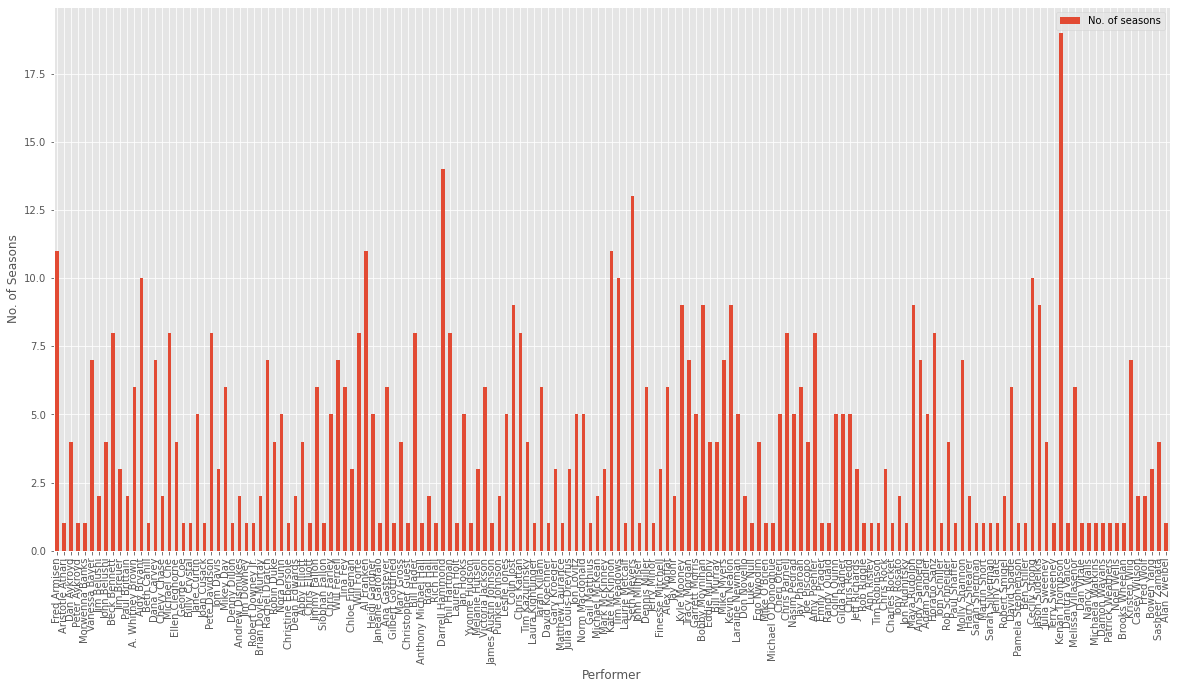

In [14]:
plt.style.use('ggplot')
ax = wiki_cast.plot(x= "Performer",y="No. of seasons", figsize = (20,10), kind = 'bar')
ax.set_ylabel('No. of Seasons')

In [15]:
# def cross_imdb_wiki():
#     for i in names['primaryName']:
#         print(i)
#         if i in wiki_cast['Performer']:
#             cross_imdb_wiki_list.append(i)
#     return cross_imdb_wiki_list

In [16]:
# cross_imdb_wiki()

In [17]:
imdb_names_df = imdb_names
imdb_names_df

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0053137,tt0031983,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0071877,tt0037382,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0056404,tt0057345,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0072562,tt0077975,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0069467,tt0083922,tt0060827,tt0050986"
...,...,...,...,...,...,...
11554305,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt14069590,tt11657662,tt2455546"
11554306,nm9993716,Essias Loberg,\N,\N,NaN,\N
11554307,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
11554308,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


In [72]:
imdb_name_list = imdb_names_df.values.tolist()
# imdb_name_list #with repeats, ALL NAMES

In [19]:
imdb_names_df.columns.tolist()

['nconst',
 'primaryName',
 'birthYear',
 'deathYear',
 'primaryProfession',
 'knownForTitles']

In [20]:
cross_imdb_wiki_list = []
for person in imdb_name_list:
    if person[1] in wiki_cast['Performer'].values:
        cross_imdb_wiki_list.append(person)

In [21]:
cross_name_list = (set([r[1] for r in cross_imdb_wiki_list]))
len(cross_name_list) # <- Missing 2 cast members

157

In [22]:
# MAKING CSV FOR CROSS IMDb LIST
# import csv
# with open('imdb_wiki_filter.csv', 'w', encoding = 'utf-8') as outfile:
#     csvout = csv.writer(outfile)
#     csvout.writerow(names.columns.tolist())
#     csvout.writerows(cross_imdb_wiki_list)

In [23]:
from collections import Counter

Counter([r[1] for r in cross_imdb_wiki_list]).most_common(10)

[('Tom Davis', 56),
 ("Mike O'Brien", 56),
 ('Bill Murray', 35),
 ('Tim Robinson', 32),
 ('Leslie Jones', 26),
 ('Chris Elliott', 24),
 ('Mike Myers', 23),
 ('Jeff Richards', 23),
 ('Dennis Miller', 21),
 ('Victoria Jackson', 18)]

In [24]:
cross_imdb_wiki_list

[['nm0000004',
  'John Belushi',
  '1949',
  '1982',
  'actor,soundtrack,writer',
  'tt0078723,tt0072562,tt0077975,tt0080455'],
 ['nm0000101',
  'Dan Aykroyd',
  '1952',
  '\\N',
  'writer,actor,producer',
  'tt0097428,tt0118747,tt0087332,tt0080455'],
 ['nm0000195',
  'Bill Murray',
  '1950',
  '\\N',
  'actor,soundtrack,writer',
  'tt1748122,tt0128445,tt0362270,tt0335266'],
 ['nm0000196',
  'Mike Myers',
  '1963',
  '\\N',
  'actor,writer,soundtrack',
  'tt0295178,tt0145660,tt0118655,tt0811138'],
 ['nm0000331',
  'Chevy Chase',
  '1943',
  '\\N',
  'actor,writer,soundtrack',
  'tt0085995,tt0097958,tt0080487,tt0092086'],
 ['nm0000345',
  'Billy Crystal',
  '1948',
  '\\N',
  'actor,writer,producer',
  'tt0101587,tt0098635,tt0113097,tt0122933'],
 ['nm0000349',
  'Joan Cusack',
  '1962',
  '\\N',
  'actress,soundtrack,writer',
  'tt0119229,tt1659337,tt0119360,tt0096463'],
 ['nm0000375',
  'Robert Downey Jr.',
  '1965',
  '\\N',
  'actor,producer,soundtrack',
  'tt1300854,tt0371746,tt4154

In [25]:
def check_names(name):
    cross_name_list = (set([r[1] for r in cross_imdb_wiki_list]))
    result = False
    
    if name in cross_name_list:
        result = True
    return result

In [26]:
def check_creds(works):
    SNL_IDs = ['tt0715791', 'tt0715791', 'tt0971348', 'tt10809086', 'tt0072562', 'tt1372614', 'tt2173702']
    result = False
    for work in works.split(','):
        if work in SNL_IDs:
            result = True
    return result

In [27]:
check_creds('tt0460619,tt0157246,tt4116284,tt8324422')

False

In [28]:
SNL_name_check = [r for r in cross_imdb_wiki_list if check_names(r[1])]
(SNL_name_check)

[['nm0000004',
  'John Belushi',
  '1949',
  '1982',
  'actor,soundtrack,writer',
  'tt0078723,tt0072562,tt0077975,tt0080455'],
 ['nm0000101',
  'Dan Aykroyd',
  '1952',
  '\\N',
  'writer,actor,producer',
  'tt0097428,tt0118747,tt0087332,tt0080455'],
 ['nm0000195',
  'Bill Murray',
  '1950',
  '\\N',
  'actor,soundtrack,writer',
  'tt1748122,tt0128445,tt0362270,tt0335266'],
 ['nm0000196',
  'Mike Myers',
  '1963',
  '\\N',
  'actor,writer,soundtrack',
  'tt0295178,tt0145660,tt0118655,tt0811138'],
 ['nm0000331',
  'Chevy Chase',
  '1943',
  '\\N',
  'actor,writer,soundtrack',
  'tt0085995,tt0097958,tt0080487,tt0092086'],
 ['nm0000345',
  'Billy Crystal',
  '1948',
  '\\N',
  'actor,writer,producer',
  'tt0101587,tt0098635,tt0113097,tt0122933'],
 ['nm0000349',
  'Joan Cusack',
  '1962',
  '\\N',
  'actress,soundtrack,writer',
  'tt0119229,tt1659337,tt0119360,tt0096463'],
 ['nm0000375',
  'Robert Downey Jr.',
  '1965',
  '\\N',
  'actor,producer,soundtrack',
  'tt1300854,tt0371746,tt4154

In [29]:
SNL_cred_check = [r for r in cross_imdb_wiki_list if check_creds(r[5])]
(SNL_cred_check)

[['nm0000004',
  'John Belushi',
  '1949',
  '1982',
  'actor,soundtrack,writer',
  'tt0078723,tt0072562,tt0077975,tt0080455'],
 ['nm0000902',
  'Jim Belushi',
  '1954',
  '\\N',
  'actor,music_department,producer',
  'tt0097637,tt0072562,tt0117468,tt0095963'],
 ['nm0001022',
  'Dana Carvey',
  '1955',
  '\\N',
  'actor,soundtrack,writer',
  'tt0072562,tt0108525,tt0105793,tt0295427'],
 ['nm0005265',
  'Kevin Nealon',
  '1953',
  '\\N',
  'actor,writer,soundtrack',
  'tt0072562,tt0116483,tt0439100,tt0120888'],
 ['nm0035488',
  'Fred Armisen',
  '1966',
  '\\N',
  'music_department,actor,writer',
  'tt0357413,tt1282140,tt0072562,tt1780441'],
 ['nm0112944',
  'A. Whitney Brown',
  '1952',
  '\\N',
  'writer,actor',
  'tt0096708,tt0072562,tt0166039,tt1094991'],
 ['nm0128639',
  'Beth Cahill',
  '\\N',
  '\\N',
  'actress,costume_designer,miscellaneous',
  'tt0155764,tt0262411,tt0164930,tt0072562'],
 ['nm0205569',
  'Tom Davis',
  '1952',
  '2012',
  'writer,actor,producer',
  'tt0086465,tt

In [30]:
SNL_df = pd.DataFrame(SNL_cred_check, columns = imdb_names.columns.tolist()).set_index('primaryName')

In [31]:
SNL_df

,nconst,birthYear,deathYear,primaryProfession,knownForTitles
primaryName,,,,,
John Belushi,nm0000004,1949,1982,"actor,soundtrack,writer","tt0078723,tt0072562,tt0077975,tt0080455"
Jim Belushi,nm0000902,1954,\N,"actor,music_department,producer","tt0097637,tt0072562,tt0117468,tt0095963"
Dana Carvey,nm0001022,1955,\N,"actor,soundtrack,writer","tt0072562,tt0108525,tt0105793,tt0295427"
Kevin Nealon,nm0005265,1953,\N,"actor,writer,soundtrack","tt0072562,tt0116483,tt0439100,tt0120888"
Fred Armisen,nm0035488,1966,\N,"music_department,actor,writer","tt0357413,tt1282140,tt0072562,tt1780441"
...,...,...,...,...,...
Aidy Bryant,nm5262775,1987,\N,"actress,writer,soundtrack","tt5462602,tt11092142,tt8962130,tt0072562"
Chris Redd,nm5412083,\N,\N,"actor,writer,soundtrack","tt3960412,tt5884792,tt7286456,tt0072562"
Fred Wolf,nm7440291,\N,\N,actor,"tt3910602,tt10222674,tt0072562"


In [32]:
wiki_cast = wiki_cast.set_index('Performer')

In [33]:
imdb_wiki_table = pd.concat([SNL_df, wiki_cast], axis=1, join="outer")

# IMDb Wiki Table concat
At this point, I have joined the Wiki and IMDb name tables together based on the cast member name. The joined table now has the unique cast member ID (nconst), birth and death years (where applicable), primary profession (actor dshould be in most, if not all of the cast professsion lists), known for titles (IMDb unique IDs for projects), Time on SNL (Years), No. of seasons, and whether or not they cast member was a: Repertory Player, Featured Player, Middle Group, "Weekend Update" Anchor, Host (after leaving the cast), and/or Writer.

For some reason, there are some cast members (Kristen Wiig, Bowen Yang, Sasheer Zamata, etc.) whose names aren't getting parsed from the IMDb data so I'll need to look into that further.

In [34]:
imdb_wiki_table

,nconst,birthYear,deathYear,primaryProfession,knownForTitles,Time on SNL,No. of seasons,Repertory Player,Featured Player,Middle Group,"""Weekend Update"" Anchor",Hosted,Writer
John Belushi,nm0000004,1949,1982,"actor,soundtrack,writer","tt0078723,tt0072562,tt0077975,tt0080455",1975–1979,4,Yes,No,No,No,No,Yes
Jim Belushi,nm0000902,1954,\N,"actor,music_department,producer","tt0097637,tt0072562,tt0117468,tt0095963",1983–1985,2,Yes,No,No,No,No,Yes
Dana Carvey,nm0001022,1955,\N,"actor,soundtrack,writer","tt0072562,tt0108525,tt0105793,tt0295427",1986–1993,7,Yes,No,No,No,Yes,Yes
Kevin Nealon,nm0005265,1953,\N,"actor,writer,soundtrack","tt0072562,tt0116483,tt0439100,tt0120888",1986–1995,9,Yes,Yes,No,Yes,No,Yes
Fred Armisen,nm0035488,1966,\N,"music_department,actor,writer","tt0357413,tt1282140,tt0072562,tt1780441",2002–2013,11,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patrick Weathers,NaN,NaN,NaN,NaN,NaN,1980–1981,1,No,Yes,No,No,No,No
Kristen Wiig,NaN,NaN,NaN,NaN,NaN,2005–2012,7,Yes,Yes,No,No,Yes,No
Casey Wilson,NaN,NaN,NaN,NaN,NaN,2008–2009,2,No,Yes,No,No,No,No
Bowen Yang,NaN,NaN,NaN,NaN,NaN,2019–present,3,Yes,Yes,No,No,No,Yes


I am now attempting to create a dictionary of all the cast members and their IMDb "Known For Titles" to create a heatmap to show overlaps. Hopefully that will work but I am still in the process of figuring out how to do this. My plan is the following:
1. Use set() to get unique names
2. Intialize a dictionary where name is key and value is empty list `(John Belushi:[])` (result.index) LEN==159 values:empty lists
3. Loop over imdb data and extract primaryName and use primaryName `human[name].append(row)` where row in imdb
    - for row in imdb grab primary name -> name variable
    - `humans[name] += knownForTitles.split(‘,’)`
    - for human, knownfor in humans.items():
    - newhumans[human] = set(knownfor)
    - humans = unique humans with all known for items

In [35]:
name_titles_dict = {}
keys = cross_name_list
for name in keys:
    name_titles_dict[name] = []

name_titles_dict

{'Chevy Chase': [],
 'John Milhiser': [],
 'Laraine Newman': [],
 'Robert Smigel': [],
 'Yvonne Hudson': [],
 'Vanessa Bayer': [],
 'Beth Cahill': [],
 'Gilda Radner': [],
 'Charles Rocket': [],
 'Jeff Richards': [],
 'Abby Elliott': [],
 'Kevin Nealon': [],
 'Aidy Bryant': [],
 'Patrick Weathers': [],
 'Ben Stiller': [],
 'Tom Davis': [],
 'Randy Quaid': [],
 'Morwenna Banks': [],
 'Rachel Dratch': [],
 'Seth Meyers': [],
 'Fred Armisen': [],
 'Don Novello': [],
 'Paul Brittain': [],
 'Bowen Yang': [],
 'Jenny Slate': [],
 'Molly Shannon': [],
 'Casey Wilson': [],
 'Al Franken': [],
 'Colin Quinn': [],
 'Kate McKinnon': [],
 'Matthew Laurance': [],
 'Dan Aykroyd': [],
 'Damon Wayans': [],
 'Brooks Wheelan': [],
 'Jon Lovitz': [],
 'David Spade': [],
 'Brad Hall': [],
 'Phil Hartman': [],
 'Laura Kightlinger': [],
 'Julia Sweeney': [],
 'Tina Fey': [],
 'Danitra Vance': [],
 'Rob Riggle': [],
 'Jim Breuer': [],
 'Punkie Johnson': [],
 'Ana Gasteyer': [],
 'Robin Duke': [],
 'Dana Carve

In [36]:
names_title_dict = {item[1]:item[5].split(',') for item in SNL_name_check}
names_title_dict

{'John Belushi': ['tt0078723', 'tt0072562', 'tt0077975', 'tt0080455'],
 'Dan Aykroyd': ['tt0097428', 'tt0118747', 'tt0087332', 'tt0080455'],
 'Bill Murray': ['tt5156614'],
 'Mike Myers': ['\\N'],
 'Chevy Chase': ['tt0085995', 'tt0097958', 'tt0080487', 'tt0092086'],
 'Billy Crystal': ['tt0101587', 'tt0098635', 'tt0113097', 'tt0122933'],
 'Joan Cusack': ['tt0119229', 'tt1659337', 'tt0119360', 'tt0096463'],
 'Robert Downey Jr.': ['tt1300854', 'tt0371746', 'tt4154796', 'tt0988045'],
 'Chris Farley': ['\\N'],
 'Janeane Garofalo': ['tt0382932', 'tt0132347', 'tt0117979', 'tt0243655'],
 'Julia Louis-Dreyfus': ['tt0462128', 'tt1759761', 'tt2390361', 'tt0098904'],
 'Eddie Murphy': ['tt0492509'],
 'Jim Belushi': ['tt0097637', 'tt0072562', 'tt0117468', 'tt0095963'],
 'Dana Carvey': ['tt0072562', 'tt0108525', 'tt0105793', 'tt0295427'],
 'Adam Sandler': ['tt13689618', 'tt10428498', 'tt0068120', 'tt12116598'],
 'Christopher Guest': ['tt4334642', 'tt1024855'],
 'Anthony Michael Hall': ['tt0468569', 't

In [37]:
# struggling quite a bit to get the unique project IDs
for i in SNL_name_check:
    unique_titles = []
    if i[1]== 'Bill Murray':
        print(set(i))
#     pattern = "[t]{2}[0-9]{7}"
#     regex = re.compile(pattern)
#     for i in regex.findall(SNL_name_check(i)):
#         unique_titles.append(i)
#         print(unique_titles)

{'tt1748122,tt0128445,tt0362270,tt0335266', '\\N', 'Bill Murray', 'nm0000195', 'actor,soundtrack,writer', '1950'}
{'\\N', 'Bill Murray', 'miscellaneous', 'tt0097132', 'nm0614853'}
{'\\N', 'Bill Murray', 'nm10343807', 'tt6384192,tt13998382', 'actor'}
{'\\N', 'tt0288154,tt0189500', 'Bill Murray', 'nm1162741', 'camera_department'}
{nan, 'Bill Murray', 'nm12931864', '\\N'}
{'\\N', 'Bill Murray', 'tt0351810', 'nm1386521', 'actor'}
{'tt0448004', '\\N', 'cinematographer', 'nm1831668', 'Bill Murray'}
{'\\N', 'actor,writer', 'Bill Murray', 'tt0457251,tt0961721', 'nm1907457'}
{'tt0122145', '\\N', 'Bill Murray', 'nm1981812', 'actor'}
{nan, '\\N', 'nm2018971', 'Bill Murray', 'tt0281438'}
{'editor,editorial_department', '\\N', 'Bill Murray', 'nm2966932', 'tt1732762,tt1210095'}
{'producer', '\\N', 'tt1490534', 'Bill Murray', 'nm3578809'}
{nan, 'tt1687207,tt1600694,tt1538443', 'Bill Murray', '1908', 'nm3673242', '1986'}
{nan, 'Bill Murray', 'nm3890281', '\\N'}
{'\\N', 'Bill Murray', 'tt1810727', 'nm4

`import pygraphviz as pgv

G = pgv.AGraph(edges,
               strict=True,
               directed=True,
               rankdir="RL",
               ranksep="0.25",
               ordering="in")

G.layout('dot')

G.draw('curr.png')

G.draw('curr.svg')`

In [38]:
type(SNL_name_check)

list

In [71]:
for i in (SNL_name_check):
    unique_titles = []
    for x in i:
        if str(x).startswith('tt'):
            tt = x.split(',')
            for title in tt:
                if title not in unique_titles:
                    print(i[1],title)
                    unique_titles.append(title)
                print(unique_titles)
            for name in names_title_dict:
                if i[1] == name:
                    names_title_dict[name].append(unique_titles)

#                     print(i[1],unique_titles)

John Belushi tt0078723
['tt0078723']
John Belushi tt0072562
['tt0078723', 'tt0072562']
John Belushi tt0077975
['tt0078723', 'tt0072562', 'tt0077975']
John Belushi tt0080455
['tt0078723', 'tt0072562', 'tt0077975', 'tt0080455']
Dan Aykroyd tt0097428
['tt0097428']
Dan Aykroyd tt0118747
['tt0097428', 'tt0118747']
Dan Aykroyd tt0087332
['tt0097428', 'tt0118747', 'tt0087332']
Dan Aykroyd tt0080455
['tt0097428', 'tt0118747', 'tt0087332', 'tt0080455']
Bill Murray tt1748122
['tt1748122']
Bill Murray tt0128445
['tt1748122', 'tt0128445']
Bill Murray tt0362270
['tt1748122', 'tt0128445', 'tt0362270']
Bill Murray tt0335266
['tt1748122', 'tt0128445', 'tt0362270', 'tt0335266']
Mike Myers tt0295178
['tt0295178']
Mike Myers tt0145660
['tt0295178', 'tt0145660']
Mike Myers tt0118655
['tt0295178', 'tt0145660', 'tt0118655']
Mike Myers tt0811138
['tt0295178', 'tt0145660', 'tt0118655', 'tt0811138']
Chevy Chase tt0085995
['tt0085995']
Chevy Chase tt0097958
['tt0085995', 'tt0097958']
Chevy Chase tt0080487
['tt0

['tt0119277']
Chris Elliott tt0972846
['tt0972846']
Michael McKean tt0129910
['tt0129910']
Tim Robinson tt0382382
['tt0382382']
Jeff Richards tt0368257
['tt0368257']
Mike O'Brien tt0238304
['tt0238304']
Mike O'Brien tt0238305
['tt0238304', 'tt0238305']
Mike O'Brien tt0238303
['tt0238304', 'tt0238305', 'tt0238303']
Mike O'Brien tt0104512
['tt0238304', 'tt0238305', 'tt0238303', 'tt0104512']
Dean Edwards tt14773254
['tt14773254']
Dean Edwards tt13645690
['tt14773254', 'tt13645690']
Dean Edwards tt12058768
['tt14773254', 'tt13645690', 'tt12058768']
Dean Edwards tt0298674
['tt14773254', 'tt13645690', 'tt12058768', 'tt0298674']
Mike Myers tt0115279
['tt0115279']
Tom Davis tt6306064
['tt6306064']
Tom Davis tt0095408
['tt6306064', 'tt0095408']
Mike O'Brien tt0457433
['tt0457433']
Mike O'Brien tt0470023
['tt0457433', 'tt0470023']
Mike O'Brien tt1107855
['tt0457433', 'tt0470023', 'tt1107855']
Mike O'Brien tt0464041
['tt0457433', 'tt0470023', 'tt1107855', 'tt0464041']
Chris Elliott tt3765728
['tt

In [62]:
names_title_dict

{'John Belushi': [['tt0078723', 'tt0072562', 'tt0077975', 'tt0080455'],
  ['tt0078723', 'tt0072562', 'tt0077975', 'tt0080455'],
  ['tt0078723', 'tt0072562', 'tt0077975', 'tt0080455'],
  ['tt0078723', 'tt0072562', 'tt0077975', 'tt0080455'],
  ['tt0077975', 'tt0080455', 'tt0072562', 'tt0078723'],
  ['tt0078723', 'tt0072562', 'tt0077975', 'tt0080455'],
  ['tt0078723', 'tt0072562', 'tt0077975', 'tt0080455'],
  [],
  [],
  ['tt0078723', 'tt0072562', 'tt0077975', 'tt0080455'],
  ['tt0078723', 'tt0072562', 'tt0077975', 'tt0080455']],
 'Dan Aykroyd': [['tt0097428', 'tt0118747', 'tt0087332', 'tt0080455'],
  ['tt0097428', 'tt0118747', 'tt0087332', 'tt0080455'],
  ['tt0097428', 'tt0118747', 'tt0087332', 'tt0080455'],
  ['tt0097428', 'tt0118747', 'tt0087332', 'tt0080455'],
  ['tt0087332', 'tt0097428', 'tt0080455', 'tt0118747'],
  ['tt0097428', 'tt0118747', 'tt0087332', 'tt0080455'],
  ['tt0097428', 'tt0118747', 'tt0087332', 'tt0080455'],
  [],
  [],
  ['tt0097428', 'tt0118747', 'tt0087332', 'tt008

{'John Belushi': [['tt0078723', 'tt0072562', 'tt0077975', 'tt0080455'],
  ['tt0078723', 'tt0072562', 'tt0077975', 'tt0080455'],
  ['tt0078723', 'tt0072562', 'tt0077975', 'tt0080455'],
  ['tt0078723', 'tt0072562', 'tt0077975', 'tt0080455'],
  ['tt0077975', 'tt0080455', 'tt0072562', 'tt0078723'],
  ['tt0078723', 'tt0072562', 'tt0077975', 'tt0080455'],
  ['tt0078723', 'tt0072562', 'tt0077975', 'tt0080455'],
  [],
  []],
 'Dan Aykroyd': [['tt0097428', 'tt0118747', 'tt0087332', 'tt0080455'],
  ['tt0097428', 'tt0118747', 'tt0087332', 'tt0080455'],
  ['tt0097428', 'tt0118747', 'tt0087332', 'tt0080455'],
  ['tt0097428', 'tt0118747', 'tt0087332', 'tt0080455'],
  ['tt0087332', 'tt0097428', 'tt0080455', 'tt0118747'],
  ['tt0097428', 'tt0118747', 'tt0087332', 'tt0080455'],
  ['tt0097428', 'tt0118747', 'tt0087332', 'tt0080455'],
  [],
  []],
 'Bill Murray': [['tt5156614'],
  ['tt1748122', 'tt0128445', 'tt0362270', 'tt0335266'],
  ['tt0097132'],
  ['tt6384192', 'tt13998382'],
  ['tt0288154', 'tt0189

In [67]:
# chunks = {n: [] for n in cross_name_list}
# for row in SNL_name_check:
#     name = row[1]
#     chunks[name].append(row)

In [68]:
# chunks

{'Chevy Chase': [['nm0000331',
   'Chevy Chase',
   '1943',
   '\\N',
   'actor,writer,soundtrack',
   'tt0085995,tt0097958,tt0080487,tt0092086']],
 'John Milhiser': [['nm2275887',
   'John Milhiser',
   '\\N',
   '\\N',
   'actor,writer,editor',
   'tt0072562,tt5990096,tt1289401,tt4061080']],
 'Laraine Newman': [['nm0628170',
   'Laraine Newman',
   '1952',
   '\\N',
   'actress,soundtrack,miscellaneous',
   'tt0102719,tt0106598,tt0116705,tt0120669']],
 'Robert Smigel': [['nm0806912',
   'Robert Smigel',
   '1960',
   '\\N',
   'writer,producer,actor',
   'tt0185431,tt0072562,tt0106052,tt0272338']],
 'Yvonne Hudson': [['nm0399994',
   'Yvonne Hudson',
   '\\N',
   '\\N',
   'actress,miscellaneous',
   'tt0277167,tt0072562'],
  ['nm4592210',
   'Yvonne Hudson',
   '\\N',
   '\\N',
   'miscellaneous,actress,casting_director',
   'tt2033480,tt3526474,tt2142935,tt2156935'],
  ['nm4997878', 'Yvonne Hudson', '\\N', '\\N', nan, 'tt2355949']],
 'Vanessa Bayer': [['nm3364779',
   'Vanessa Baye

In [41]:
# for i in (SNL_name_check):
#     unique_titles = []
#     for x in i:
#         for name in names_title_dict:
#             if str(x).startswith('tt'):
#                 tt = str(x).split(',')
# #                 print(tt)
#                 if i[1] == name:
#                     unique_titles.append(tt)
#                     names_title_dict.update({i[1]:unique_titles})

#                     print(i[1],unique_titles)
# #                 print(unique_titles)

John Belushi [['tt0078723', 'tt0072562', 'tt0077975', 'tt0080455']]
Dan Aykroyd [['tt0097428', 'tt0118747', 'tt0087332', 'tt0080455']]
Bill Murray [['tt1748122', 'tt0128445', 'tt0362270', 'tt0335266']]
Mike Myers [['tt0295178', 'tt0145660', 'tt0118655', 'tt0811138']]
Chevy Chase [['tt0085995', 'tt0097958', 'tt0080487', 'tt0092086']]
Billy Crystal [['tt0101587', 'tt0098635', 'tt0113097', 'tt0122933']]
Joan Cusack [['tt0119229', 'tt1659337', 'tt0119360', 'tt0096463']]
Robert Downey Jr. [['tt1300854', 'tt0371746', 'tt4154796', 'tt0988045']]
Chris Farley [['tt0118708', 'tt0115697', 'tt0114694', 'tt0106598']]
Janeane Garofalo [['tt0382932', 'tt0132347', 'tt0117979', 'tt0243655']]
Julia Louis-Dreyfus [['tt0462128', 'tt1759761', 'tt2390361', 'tt0098904']]
Eddie Murphy [['tt0117218', 'tt0443489', 'tt0094898', 'tt0126029']]
Jim Belushi [['tt0097637', 'tt0072562', 'tt0117468', 'tt0095963']]
Dana Carvey [['tt0072562', 'tt0108525', 'tt0105793', 'tt0295427']]
Adam Sandler [['tt0120484', 'tt0120888'

Mike Myers [['tt4497152']]
Dean Edwards [['tt0122905']]
Jeff Richards [['tt4780202']]
Brad Hall [['tt1554356']]
Mark McKinney [['tt6225166']]
Mark McKinney [['tt5441646', 'tt4823678']]
Phil Hartman [['tt4828104']]
Fred Wolf [['tt3910602', 'tt10222674', 'tt0072562']]
Phil Hartman [['tt4701488']]
Mike Myers [['tt4853866']]
Victoria Jackson [['tt4906964']]
Sarah Sherman [['tt9534540', 'tt15467926', 'tt8425308', 'tt14601874']]
Lauren Holt [['tt8394996', 'tt8937092', 'tt0072562', 'tt7546290']]
Tim Robinson [['tt4661598']]
Molly Shannon [['tt3675186']]
Chris Elliott [['tt5124078']]
Chris Farley [['tt0142235']]
Brad Hall [['tt5173520', 'tt6738058']]
Mike O'Brien [['tt3906560']]
Mark McKinney [['tt3739110']]
Phil Hartman [['tt5298646']]
Chris Rock [['tt5346900']]
Mike O'Brien [['tt7119506', 'tt5352578']]
Mike Myers [['tt5442834', 'tt6137590']]
Mike Myers [['tt3109150']]
Mike O'Brien [['tt5542640']]
Jeff Richards [['tt3859146']]
Mark McKinney [['tt1216491', 'tt0795461', 'tt6285944']]
Tom Davis 

In [42]:
Counter(names_title_dict.keys())

Counter({'John Belushi': 1,
         'Dan Aykroyd': 1,
         'Bill Murray': 1,
         'Mike Myers': 1,
         'Chevy Chase': 1,
         'Billy Crystal': 1,
         'Joan Cusack': 1,
         'Robert Downey Jr.': 1,
         'Chris Farley': 1,
         'Janeane Garofalo': 1,
         'Julia Louis-Dreyfus': 1,
         'Eddie Murphy': 1,
         'Jim Belushi': 1,
         'Dana Carvey': 1,
         'Adam Sandler': 1,
         'Christopher Guest': 1,
         'Anthony Michael Hall': 1,
         'Jon Lovitz': 1,
         'Jay Mohr': 1,
         'Randy Quaid': 1,
         'Chris Rock': 1,
         'Rob Schneider': 1,
         'Martin Short': 1,
         'Ben Stiller': 1,
         'Damon Wayans': 1,
         'Christine Ebersole': 1,
         'Will Ferrell': 1,
         'Jane Curtin': 1,
         'Nora Dunn': 1,
         'Tim Meadows': 1,
         'Kevin Nealon': 1,
         'David Spade': 1,
         'Fred Armisen': 1,
         'Peter Aykroyd': 1,
         'Morwenna Banks': 1,
    

In [43]:
# for i in (SNL_name_check):
#     for x in i:
#         unique_titles = []
#         if str(x).startswith('tt'):
#             tt = x.split(',')
#             unique_titles = unique_titles.append(tt)
# #             print(unique_titles)
#     if i[1] == names_title_dict.keys():
#         names_title_dict.items(unique_titles)
#     print(i[1], tt)

John Belushi ['tt0078723', 'tt0072562', 'tt0077975', 'tt0080455']
Dan Aykroyd ['tt0097428', 'tt0118747', 'tt0087332', 'tt0080455']
Bill Murray ['tt1748122', 'tt0128445', 'tt0362270', 'tt0335266']
Mike Myers ['tt0295178', 'tt0145660', 'tt0118655', 'tt0811138']
Chevy Chase ['tt0085995', 'tt0097958', 'tt0080487', 'tt0092086']
Billy Crystal ['tt0101587', 'tt0098635', 'tt0113097', 'tt0122933']
Joan Cusack ['tt0119229', 'tt1659337', 'tt0119360', 'tt0096463']
Robert Downey Jr. ['tt1300854', 'tt0371746', 'tt4154796', 'tt0988045']
Chris Farley ['tt0118708', 'tt0115697', 'tt0114694', 'tt0106598']
Janeane Garofalo ['tt0382932', 'tt0132347', 'tt0117979', 'tt0243655']
Julia Louis-Dreyfus ['tt0462128', 'tt1759761', 'tt2390361', 'tt0098904']
Eddie Murphy ['tt0117218', 'tt0443489', 'tt0094898', 'tt0126029']
Jim Belushi ['tt0097637', 'tt0072562', 'tt0117468', 'tt0095963']
Dana Carvey ['tt0072562', 'tt0108525', 'tt0105793', 'tt0295427']
Adam Sandler ['tt0120484', 'tt0120888', 'tt0142342', 'tt0185431']
C